In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import scipy.special as sci

# Importing data

In [4]:
"def altaz"
"def flux"
"def phase"
"def beam()"
"def phasor()"
"create a class that tells you the antennas properties like location and stuff"
"make a function that creates an airy beam"

'make a function that creates an airy beam'

In [4]:
%matplotlib notebook

In [7]:
#Import the data using astropy.io.fits.open()
hdul = fits.open('GLEAM_EGC_v2.fits')

#Create a dataFrame with all of the data organized by column
frame = pd.DataFrame(hdul[1].data)

In [8]:
#List all of the columns
print(hdul[1].data.columns)
print('Number of columns: ',len(frame.columns))

ColDefs(
    name = 'Name'; format = '20A'
    name = 'background_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'local_rms_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'ra_str'; format = '11A'; unit = 'h:m:s'
    name = 'dec_str'; format = '12A'; unit = 'd:m:s'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'
    name = 'err_RAJ2000'; format = 'D'; unit = 'deg'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'
    name = 'err_DEJ2000'; format = 'D'; unit = 'deg'
    name = 'peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'err_peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'err_int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'a_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_a_wide'; format = 'E'; unit = 'arcsec'
    name = 'b_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_b_wide'; format = 'E'; unit = 'arcsec'
    name = 'pa_wide'; format = 'E'; unit = 'deg'
    name = 'err_pa_wide'; form

In [9]:
#Extract the Flux, RA and DEC Columns
#Lets just look at the brightest stars,  
star_number =3072#hp.nside2npix(1000)


new_frame = [col for col in frame.columns if ('int_flux' in col or 'RAJ2000' in col or 'DEJ2000' in col) and 'err' not in col]
new_frame = frame[new_frame]

#Dropping nan values, we dont want those.
new_frame = new_frame.dropna(axis = 0, how = 'any')


#Sorting columns by increasing Flux, lets see the brightest to the least bright
new_frame = new_frame.sort_values(by = 'int_flux_wide')

#Creating a frame with the 1000 largest fluxes
max_frame = new_frame.iloc[len(new_frame)-star_number:]

#Turning the RA, DEC, names, and peak_flux_wide into arrays for easy use
RA_gleam = np.asarray(max_frame.RAJ2000)
DEC_gleam =np.asarray(max_frame.DEJ2000)
flux_gleam_151 = np.asarray(max_frame.int_flux_151)

In [6]:
flux_gleam_151[1]

NameError: name 'flux_gleam_151' is not defined

In [11]:
x = interp1d(RA_gleam,DEC_gleam,"cubic")


In [12]:
max_frame

,RAJ2000,DEJ2000,int_flux_wide,int_flux_076,int_flux_084,int_flux_092,int_flux_099,int_flux_107,int_flux_115,int_flux_122,...,int_flux_166,int_flux_174,int_flux_181,int_flux_189,int_flux_197,int_flux_204,int_flux_212,int_flux_220,int_flux_227,int_flux_fit_200
56972,53.214283,-58.883747,2.415161,5.307244,4.880888,4.562526,4.230185,4.062823,3.843019,3.643023,...,2.858967,2.781896,2.670835,2.568234,2.451488,2.409855,2.338741,2.281795,2.208058,2.459250
165142,23.351461,24.461100,2.415440,5.915522,5.490874,5.247050,4.943504,4.595185,4.259915,4.039530,...,2.854405,2.707194,2.685980,2.545623,2.407534,2.360880,2.302757,2.168494,2.141075,2.420973
215871,131.289124,-11.622453,2.415917,5.014791,4.590799,4.213314,3.949327,3.722643,3.583378,3.452297,...,2.741501,2.643781,2.550154,2.436148,2.316330,2.279817,2.182931,2.166198,2.046870,2.322056
242141,156.386444,5.317463,2.415977,5.552347,5.036762,4.841537,4.536455,4.009232,3.967330,3.786134,...,2.909546,2.795512,2.707927,2.594093,2.397461,2.251235,2.159547,2.113463,2.064356,2.386705
132319,67.371490,-9.548582,2.416112,6.483027,5.859226,5.299961,4.912292,4.598495,4.287398,4.063645,...,2.916611,2.820471,2.678406,2.600015,2.492496,2.406849,2.324871,2.178743,2.094152,2.433292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266765,293.988464,-46.344551,61.793537,151.090759,141.014725,128.626572,116.566994,94.208466,90.589989,83.974586,...,57.082157,63.611805,63.954525,66.460060,64.467476,61.751926,59.734615,56.471710,54.479408,56.213244
237415,187.275879,2.047744,74.995041,139.836960,134.327698,124.787437,119.481178,112.081902,106.930702,102.557899,...,84.869179,79.372368,76.192551,75.515564,73.872574,75.144600,75.161293,73.069115,72.682610,75.303691
1797,329.278900,-69.688171,83.462608,135.129227,124.533806,126.000412,122.838211,112.510880,108.826447,106.346992,...,93.284203,90.106026,91.624710,87.193733,84.929482,84.352974,77.332794,78.647491,76.865593,84.073415
168281,69.269493,29.669428,183.307114,352.720367,335.537567,306.668793,287.555603,277.505188,266.713013,252.885208,...,213.660080,198.113525,195.331558,192.729980,182.604630,182.176056,177.663849,178.486176,168.604797,184.806078


In [13]:
def altaz(ra, dec,time, rad = False, lat=37.875*np.pi/180):
    """
    Calculates Altitude and Azimuth at given times, centered at HERA
    
    parameters: 
    time = lst in radian
    ra = Right ascension of the star in degrees or radians
    dec = Declination of the star in degrees or radians
    rad = True if RA and DEC are in radian or False if RA and DEC are in degree
    
    returns:
    Returns alt, and az all in radian
    
    """
    PI = np.pi
    #Setting the latitude/longitude of HERA
    if rad == False:
        ra =ra* PI/180
        dec =dec*PI/180
    
    #Converts the LST to hour angle
    hour_array = np.mod((time - ra), 2*PI)
    
    #Calculates the Altitude and Azimuth
    alt = np.arcsin(np.sin(dec)*np.sin(lat)+np.cos(dec)*np.cos(lat)*np.cos(hour_array))
    az = np.arctan2(np.sin(hour_array)*np.cos(dec), np.cos(hour_array)*np.cos(dec)*np.sin(lat)-np.sin(dec)*np.cos(lat))+PI
    
    
    return alt, az

In [14]:
#Make a series of times in LST (local sidereal time, just goes from 0-2pi)
lst =np.linspace(0,2*np.pi,1000)

#Lets just look at one source lets call it source 0, we defined the ra and dec array above so,
source=13
alt,az = altaz(RA_gleam[source], DEC_gleam[source], lst)

In [24]:
def beam (l):
    x=np.ones(l) #makes a list of length 'l' and makes all the entries "1".
    return x
    
    

In [25]:
def bwf(ra, dec, flux,time):
    a = np.linspace(0,2*np.pi,1000)
   # for time in a:
    alt,az = altaz(ra, dec, time) #calculates alt and az for 1000 different times for one rotation
    mybeam= beam(len(a)) #so far, this is a beam of 1's
    interp = np.interp(mybeam, np.pi/2-alt, az)
    prod = flux*interp
    add= np.sum(prod)
    beam_weighted_flux=add
    
    #altaz()
    #find the alt and az for time in times
    #find the flux of the soruce at those times
    # define a beam of all 1's 
    #multiply the beam and the flux
    #add all the beam*flux in an array
    #append a list/array with that values. (a=np.array[]. a=np.append(alt,az))
    
    
    
    
    return beam_weighted_flux


In [36]:
mybeam = beam(1000)
print (mybeam)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [18]:
x=[]
time=np.linspace(0,2*np.pi,3000)
for moment in time:
    x.append(bwf(RA_gleam,DEC_gleam,flux_gleam_151,moment))

ValueError: operands could not be broadcast together with shapes (3072,) (1000,) 

In [1]:
type(bwf(RA_gleam,DEC_gleam,flux_gleam_151,moment))

NameError: name 'bwf' is not defined

In [74]:
test

array([6.00267019, 6.00100364, 5.99913842, ..., 5.99715436, 5.99973744,
       6.00328421])

<IPython.core.display.Javascript object>


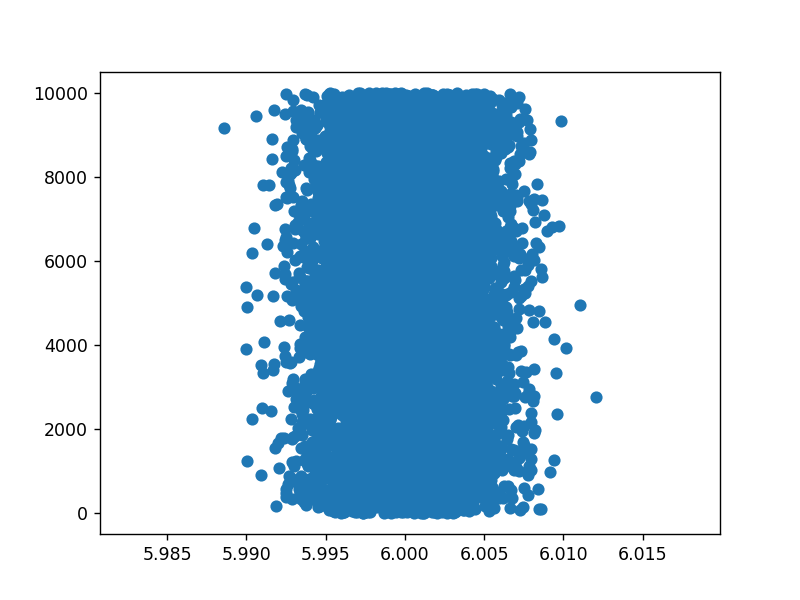

In [75]:
plt.figure()
plt.scatter(test, np.arange(10000))

# Airy

In [187]:
def airy(x,y, nu, a=6, sigma_ant=0,  sigma_x=0, sigma_y=0):
    
    """Airy beam takes in an aperature, altitude, and frequency and gets the airy function
    alt=np.linspace(0, np.pi, 100)
    nu=np.linspace(140, 160,50)*10**6   these two are the alt and nu inputs I used.
"""
    ax = np.random.normal(6,sigma_ant)
    ay = np.random.normal(6,sigma_ant)
    xs = np.random.normal(0,sigma_x)
    ys = np.random.normal(0,sigma_y)
    
    #a is the aperature of the dish which is 6 meters
    c=3.0*10**8 #speed of light in m/s
    k=2*np.pi*nu/c #wavenumber
    print(k.shape)
   # kasintheta = np.einsum('i,j->ij',k,a*np.sin(np.pi/2-alt)) 
    #airy_funct = (2*sci.jv(1,kasintheta)/(kasintheta))**2 #Sci.jv are the bessel functions of the 1st kind, 1st order
    
    
    kasintheta = np.einsum('i,j->ij',k,a*np.sin(np.pi/2-alt)) 
    
    kshape=np.einsum("i,k->ik",k,(ax**2*(x-xs)**2+ay**2*(y-ys)**2))
    airy_funct = (2*sci.jv(1,kshape)**0.5/(kshape)**0.5)**2 #Sci.jv are the bessel functions of the 1st kind
    
    return airy_funct

In [188]:
def position_vector( alt, az):
        '''
        Calculates the position vector to a source in the sky
        Parameters:
        alt = the altitude of the source from the horizon, given in radians
        az  = the angle from north, moving towards the east, given in radians
        Returns:
        vector in cartesian coordinates [x,y,z] as a numpy.ndarray
        '''
        x = np.cos(alt) * np.cos(az)
        y = np.cos(alt) * np.sin(az)
        z = np.sin(alt)
        vector = np.asarray([x,y,z])
        return x, y, z

In [189]:
alt=np.linspace(0, np.pi, 1000)
nu=np.linspace(140, 160,50)*10**6 #frequency from 140-160MHz
az = np.linspace(0, 2*np.pi, 1000)
x, y, _=position_vector(alt, az) 

In [208]:
test = airy(x, y, nu, sigma_ant = 0, sigma_x = 0.05, sigma_y = 0)

(50,)


C:\Users\Jerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


In [209]:
%matplotlib notebook

<IPython.core.display.Javascript object>


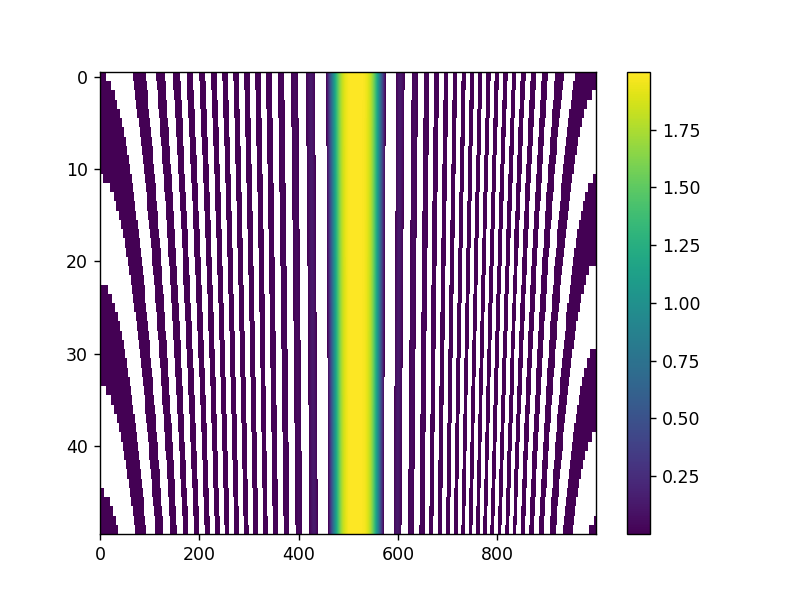

In [210]:
plt.figure()
plt.imshow(np.abs(test), aspect='auto')
plt.colorbar()

In [ ]:
def airy(alt, nu, a=6):
    
    """Airy beam takes in an aperature, altitude, and frequency and gets the airy function"""
    
    c=3.0*10**8 #speed of light in m/s
    k=2*np.pi*nu/c #wavenumber
    kasintheta = np.einsum('i,j->ij',k,a*np.sin(np.pi/2-alt) )
    airy_funct = (2*sci.jv(1,kasintheta)/(kasintheta))**2
    
    return airy_funct

In [7]:

#Airy(test.nu, test.aperture, test.alt)
#J1=sci.jv(1,k) #bessel function of 1st kind. Need to figure out what x is supposed to be
#k=2*np.pi*np.sin(np.pi/2 - test.alt)
#airy= (2*J1/k)**2
#return airy
airy = 2*sci.jv(1,kastheta)/kastheta




NameError: name 'airy' is not defined

# Ant class

In [212]:
def hex_array(hex_num, sep=14.6, split_core=True):
        '''
        ### NOT MY CODE (Couldn’t install the dependency)###
        Build a hexagonal array configuration, nominally matching HERA’s ideal configuration.
        Args:
            hex_num (int): the hexagon (radial) number of the core configuration.
                Number of core antennas returned is 3N^2 - 3N + 1.
            sep (float): the separation between hexagonal grid points (meters).
            split_core (bool): fractures the hexagonal core into tridrents that subdivide
                a hexagonal grid. Loses N antennas, so the number of core antennas returned
                is 3N^2 - 4N + 1.
        Returns:
            dict: a dictionary of antenna numbers and positions.
                Positions are x,y,z in topocentric coordinates, in meters.
        Source:
            https://github.com/HERA-Team/hera_sim/blob/master/hera_sim/antpos.py
        '''
        # Main Hex
        positions = []
        for row in range(
                hex_num - 1, -hex_num + split_core, -1
        ):  # the + split_core deletes a row
            for col in range(0, 2 * hex_num - abs(row) - 1):
                x_pos = sep * ((-(2 * hex_num - abs(row)) + 2) / 2.0 + col)
                y_pos = row * sep * 3 ** 0.5 / 2
                positions.append([x_pos, y_pos, 0])
        # unit vectors
        up_right = sep * np.asarray([0.5, 3 ** 0.5 / 2, 0])
        up_left = sep * np.asarray([-0.5, 3 ** 0.5 / 2, 0])
        # Split the core into 3 pieces
        if split_core:
            new_pos = []
            for i, pos in enumerate(positions):
                theta = np.arctan2(pos[1], pos[0])
                if pos[0] == 0 and pos[1] == 0:
                    new_pos.append(pos)
                elif -np.pi / 3 < theta < np.pi / 3:
                    new_pos.append(np.asarray(pos) + (up_right + up_left) / 3)
                elif np.pi / 3 <= theta < np.pi:
                    new_pos.append(np.asarray(pos) + up_left - (up_right + up_left) / 3)
                else:
                    new_pos.append(pos)
            positions = new_pos
        return {i: pos for i, pos in enumerate(np.array(positions))}

In [285]:
class Ant:
    def __init__(self, ant_num):
            '''
            Right now i used indexes to implement all_baselines
            but if i know exactly how we are going to call the baseline,
            I will change based on that
            '''

            df = [] # Some for loop that calls the information from frame
            self.antennas = hex_array(ant_num)
            self._baselines()
   
    def _baselines(self):
        bls = {}
        for ant_i, pos_i in self.antennas.items():
            for ant_j, pos_j in self.antennas.items():
                if not (ant_j, ant_i) in bls:
                    bls[ant_i, ant_j] = pos_j-pos_i
                else:
                    pass
        self.bls = bls

In [287]:
test= Ant(4)

<IPython.core.display.Javascript object>


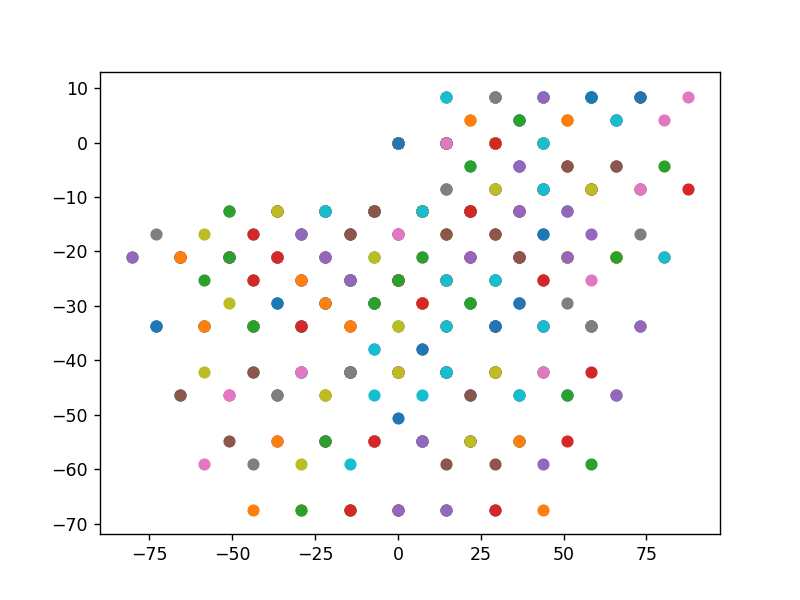

In [291]:
test.antennas
plt.figure()
for i in test.bls:
    plt.scatter(test.bls[i][0],test.bls[i][1])

In [274]:
test = hex_array(4)
print(test)

{0: array([-29.2       ,  42.14656965,   0.        ]), 1: array([-14.6       ,  42.14656965,   0.        ]), 2: array([ 0.        , 42.14656965,  0.        ]), 3: array([14.6       , 42.14656965,  0.        ]), 4: array([-36.5       ,  29.50259876,   0.        ]), 5: array([-21.9       ,  29.50259876,   0.        ]), 6: array([-7.3       , 29.50259876,  0.        ]), 7: array([ 7.3       , 29.50259876,  0.        ]), 8: array([29.2       , 33.71725572,  0.        ]), 9: array([-43.8       ,  16.85862786,   0.        ]), 10: array([-29.2       ,  16.85862786,   0.        ]), 11: array([-14.6       ,  16.85862786,   0.        ]), 12: array([ 0.        , 16.85862786,  0.        ]), 13: array([21.9       , 21.07328483,  0.        ]), 14: array([36.5       , 21.07328483,  0.        ]), 15: array([-43.8,   0. ,   0. ]), 16: array([-29.2,   0. ,   0. ]), 17: array([-14.6,   0. ,   0. ]), 18: array([0., 0., 0.]), 19: array([14.6       ,  8.42931393,  0.        ]), 20: array([29.2       ,  8.42

In [231]:
zero_one = test[1]-test[0]

In [279]:
bls = {}
for ant_i, pos_i in test.items():
    for ant_j, pos_j in test.items():
        if not (ant_j, ant_i) in bls:
            bls[ant_i, ant_j] = pos_j-pos_i
        else:
            pass

In [278]:
bls

{(0, 0): array([0., 0., 0.]),
 (0, 1): array([14.6,  0. ,  0. ]),
 (0, 2): array([29.2,  0. ,  0. ]),
 (0, 3): array([43.8,  0. ,  0. ]),
 (0, 4): array([ -7.3      , -12.6439709,   0.       ]),
 (0, 5): array([  7.3      , -12.6439709,   0.       ]),
 (0, 6): array([ 21.9      , -12.6439709,   0.       ]),
 (0, 7): array([ 36.5      , -12.6439709,   0.       ]),
 (0, 8): array([58.4       , -8.42931393,  0.        ]),
 (0, 9): array([-14.6       , -25.28794179,   0.        ]),
 (0, 10): array([  0.        , -25.28794179,   0.        ]),
 (0, 11): array([ 14.6       , -25.28794179,   0.        ]),
 (0, 12): array([ 29.2       , -25.28794179,   0.        ]),
 (0, 13): array([ 51.1       , -21.07328483,   0.        ]),
 (0, 14): array([ 65.7       , -21.07328483,   0.        ]),
 (0, 15): array([-14.6       , -42.14656965,   0.        ]),
 (0, 16): array([  0.        , -42.14656965,   0.        ]),
 (0, 17): array([ 14.6       , -42.14656965,   0.        ]),
 (0, 18): array([ 29.2       

In [233]:
test_2 = {'a':1, 'b':2}

In [234]:
test_2

{'a': 1, 'b': 2}

In [235]:
for key, item in test_2.items():
    print(key)
    print(item)

a
1
b
2


In [252]:
a = np.arange(3)
b=np.arange(3)
print(a)

[0 1 2]


In [247]:
a = np.arange(4)
if 3 is not in a:
   z print('me')

SyntaxError: invalid syntax (<ipython-input-247-46a99c1bd66d>, line 2)

In [250]:
hm = {}
for i in a:
    for j in b:
        if not (j,i) in hm: #if ji is not in hm
            hm[(i,j)]=0
        else:
            pass

In [251]:
hm

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (1, 1): 0, (1, 2): 0, (2, 2): 0}